In [2]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation

try:
    data = pd.read_csv("resources/resources/winequality-red.csv", sep=';')
except EnvironmentError:
    print("Data not found")

# V.1 Exploring the green reds
## a) A function that plots a scatterplot matrix of red wine data

In [67]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    """
    """
    num_samples, num_features = wine_data.shape
    fig, axs = plt.subplots(num_features,num_features, figsize=(35,35))
    fig.subplots_adjust(hspace=0, wspace=0)
    for ax in axs.flat:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
    for i, title in enumerate(wine_data.columns):
        axs[i,i].annotate(title.replace(' ', '\n'), (0.5, 0.5), xycoords='axes fraction', 
                          ha='center', va='center', fontsize=18)
    good_quality = wine_data[(wine_data['quality'] > good_threshold)]
    bad_quality = wine_data[(wine_data['quality'] < bad_threshold)]
    for i in range(num_features):
        for j in range(i + 1, num_features):
            axs[i,j].scatter(good_quality.iloc[:, i], good_quality.iloc[:, j], c=['g'], marker='.')
            axs[j,i].scatter(good_quality.iloc[:, j], good_quality.iloc[:, i], c=['g'], marker='.')
            axs[i,j].scatter(bad_quality.iloc[:, i], bad_quality.iloc[:, j], c=['r'], marker='.')
            axs[j,i].scatter(bad_quality.iloc[:, j], bad_quality.iloc[:, i], c=['r'], marker='.')

    if save_plot:
        plt.savefig('red_wine_plot.png')
    return fig

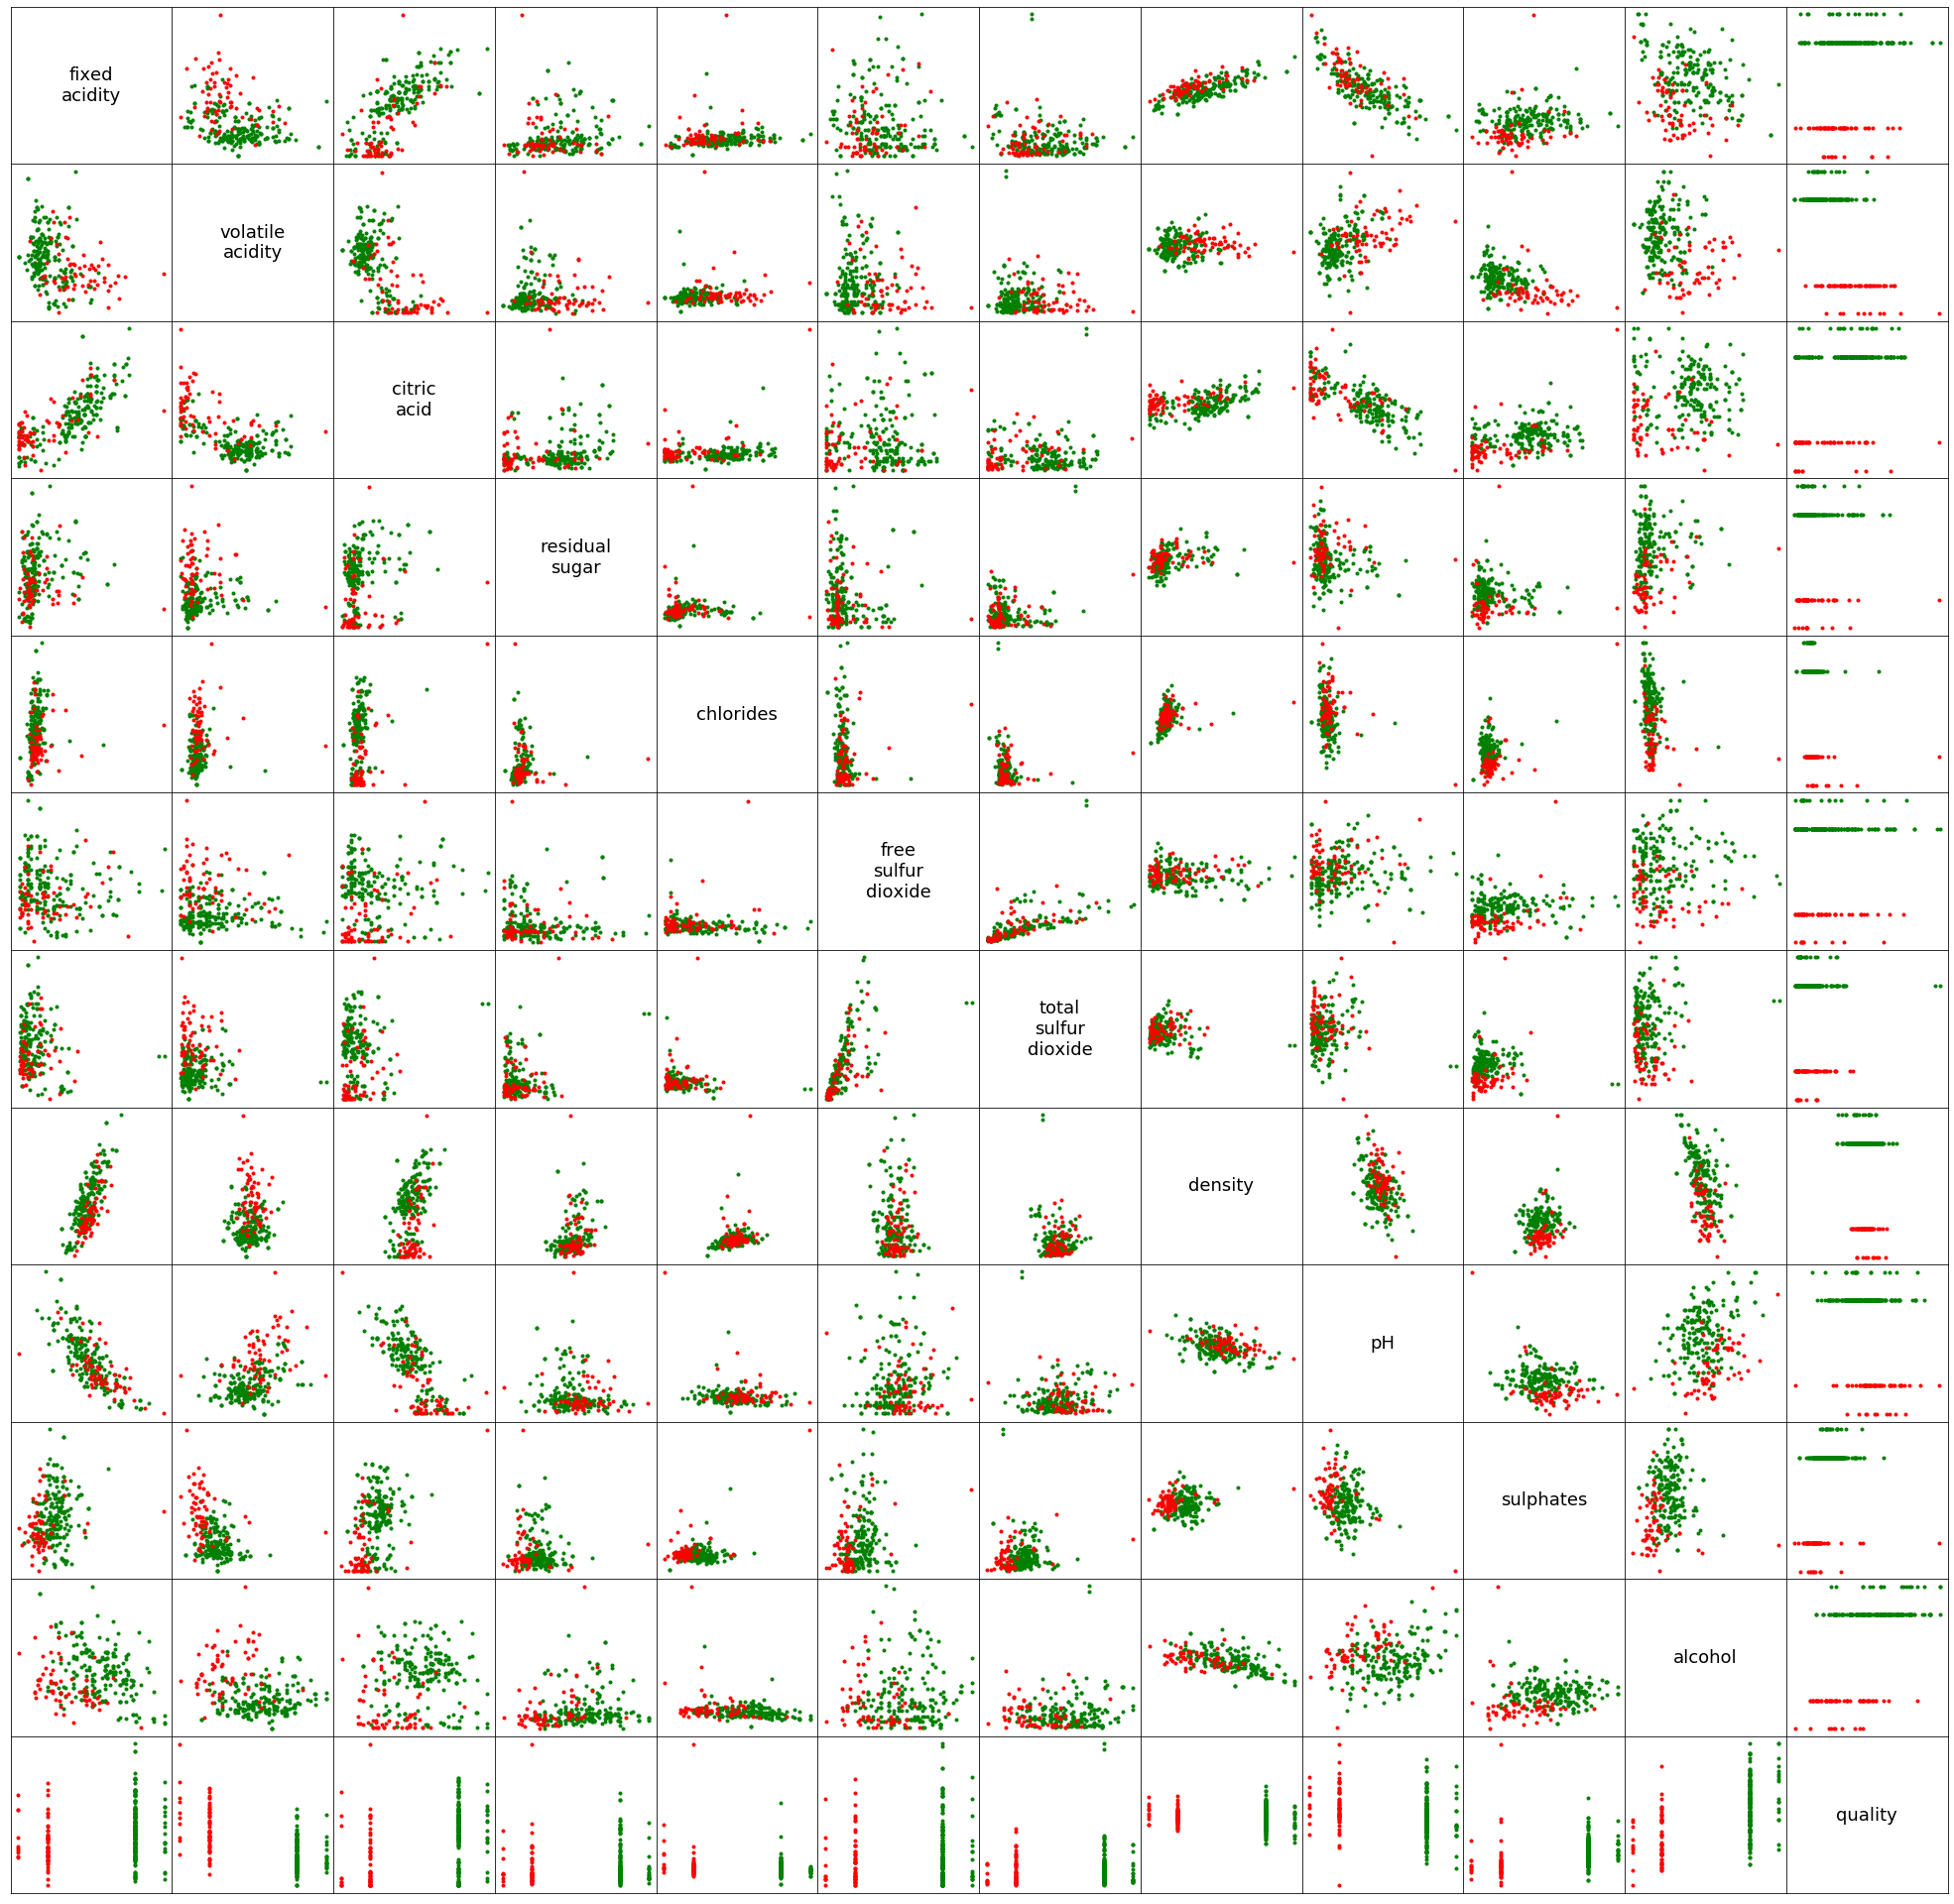

In [69]:
fig = plot_scatter_matrix(data, 6, 5, True)
plt.show(fig)

In [56]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
